In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from IPython.display import Image
np.set_printoptions(precision = 3)

In [2]:
data = pd.read_csv("jester-data-1.csv", header=None)
#del data["0"]
#d = data.to_latex()
#text_file = open("Output_lab4_test.txt", "w")
#text_file.write(d)
#text_file.close()

In [3]:


#text_file.close()data.columns
del data[data.columns[0]]



In [4]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [5]:
user_ratings = data.values
#user_ratings = data.values[0:100]

In [6]:
user_ratings_vali = np.zeros(user_ratings.shape) + 99.0
user_ratings_copy = user_ratings.copy() 
count = 0
loc_log = []
for x in range(0,user_ratings.shape[0]):
    for y in range(0,user_ratings.shape[1]):
        if (user_ratings_copy[x,y]!=99.0):
            if (np.random.random() > 0.9):
                count += 1
                temp = user_ratings_copy[x,y]
                user_ratings_copy[x,y] = user_ratings_vali[x,y]
                user_ratings_vali[x,y] = temp
                loc_log.append((x,y))
                #print(temp)
print(user_ratings_vali,'\n', count,'\n', count/(user_ratings.shape[0]*user_ratings.shape[1]))

[[99.   99.   99.   ... 99.   99.   99.  ]
 [99.   99.    6.36 ... 99.   99.   99.  ]
 [99.   99.   99.   ... 99.   99.   99.  ]
 ...
 [99.   99.   99.   ... 99.   99.   99.  ]
 [99.   99.   99.   ... 99.   99.   99.  ]
 [99.    2.67 99.   ... 99.   99.   99.  ]] 
 181580 
 0.07268142336789017


In [7]:
len(loc_log)

181580

In [8]:
n_features = 100
latent_user_preferences = np.random.random((user_ratings.shape[0], n_features))
latent_item_features = np.random.random((user_ratings.shape[1],n_features))

In [9]:


print('user_ratings.shape:           ',user_ratings.shape)
print('latent_user_preferences.shape:',latent_user_preferences.shape)
print('latent_item_features.shape:   ',latent_item_features.shape)



user_ratings.shape:            (24983, 100)
latent_user_preferences.shape: (24983, 100)
latent_item_features.shape:    (100, 100)


In [10]:


user_ratings, user_ratings.shape



(array([[-7.82,  8.79, -9.66, ..., 99.  , 99.  , 99.  ],
        [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
        [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
        ...,
        [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
        [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
        [ 2.43,  2.67, -3.98, ..., 99.  , 99.  , 99.  ]]), (24983, 100))

In [11]:
np.random.random()

0.18512709419045315

In [12]:
train_mse_loglist = []
test_mse_loglist = []
best_latent_user_preferences = latent_user_preferences.copy()
best_latent_item_features = latent_item_features.copy()
best_test_mse = 99999.0
best_loc = 0

In [13]:
def predict_rating(user_id,item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)  #linear

def train(user_id, item_id, rating,alpha = 0.0001):
    
    #print (item_id)
    prediction_rating = predict_rating(user_id, item_id)
    err =  ( prediction_rating- rating );
    #print (err)
    user_pref_values = latent_user_preferences[user_id][:]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    


def sgd(iterations = 300000):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    global best_latent_user_preferences
    global best_latent_item_features
    global best_test_mse
    global best_loc
    err_mse_log = 99999.0
    for iteration in range(0,iterations):
        error = []
        vali_err = []
        for user_id in range(0,latent_user_preferences.shape[0]):
            for item_id in range(0,latent_item_features.shape[0]):
                rating = user_ratings_copy[user_id][item_id]
                if(rating != 99):
                    err = train(user_id,item_id,rating)
                    error.append(err)
                    #print(rating)
        mse = (np.array(error) ** 2).mean()
        train_mse_loglist.append(mse)
        err_mse = mse - err_mse_log
        #if (err_mse>0):
        #    print(mse, err_mse, err_mse_log)
        #    break
        err_mse_log = mse
        for loc in loc_log:
            vali_err.append(user_ratings_vali[loc[0]][loc[1]]-latent_user_preferences[loc[0]].dot(latent_item_features[loc[1]]))
        test_mse = (np.array(vali_err) ** 2).mean()
        test_mse_loglist.append(test_mse)
        if (test_mse < best_test_mse):
            best_test_mse = test_mse
            best_latent_user_preferences = latent_user_preferences.copy()
            best_latent_item_features = latent_item_features.copy()
            best_loc = iteration
        if (iteration > best_loc+100):
            break
        #print(iteration)
        #if(iteration%100 == 0 ):
        print (iteration, ':=', mse, err_mse, test_mse)

In [14]:
sgd()

0 := 32.59781279303459 -99966.40218720697 25.43390616268211
1 := 25.202272992489924 -7.395539800544668 25.301451931157214
2 := 25.03928557617615 -0.16298741631377212 25.20090818316198
3 := 24.909706753260377 -0.12957882291577505 25.11680008593907
4 := 24.79601528059063 -0.11369147266974622 25.036289764099834
5 := 24.683076282796385 -0.11293899779424521 24.946828967103745
6 := 24.555632255849545 -0.12744402694683998 24.834250824610038
7 := 24.39628542093393 -0.15934683491561685 24.68119397277547
8 := 24.184055163911793 -0.21223025702213505 24.46621918765716
9 := 23.89420872478584 -0.2898464391259523 24.164659445256127
10 := 23.500848419712018 -0.39336030507382347 23.75299305815273
11 := 22.98416559081242 -0.5166828288995973 23.218405201665473
12 := 22.342773824228995 -0.6413917665834248 22.57221992767609
13 := 21.606350269415557 -0.7364235548134381 21.859221698337734
14 := 20.83731635234685 -0.7690339170687075 21.150533705506273
15 := 20.112516451732905 -0.7247999006139452 20.5172875648

KeyboardInterrupt: 

In [15]:
del train_mse_loglist[0]

In [16]:
best_loc

16

In [17]:
import seaborn as sns


In [18]:
plotdata1 = DataFrame(np.vstack((np.arange(np.array(train_mse_loglist).shape[0]), train_mse_loglist)).T, columns=['iterations', 'train_MSE'])


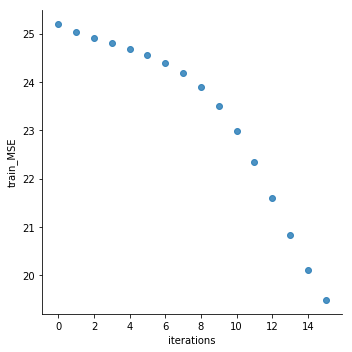

In [19]:
sns_plot = sns.lmplot(plotdata1.columns[0], plotdata1.columns[1], data=plotdata1, fit_reg=False)
sns_plot.savefig("Fulltext_predictions_trainMSE_%df_%d.png"%(n_features, best_loc), bbox_inches='tight')
sns_plot

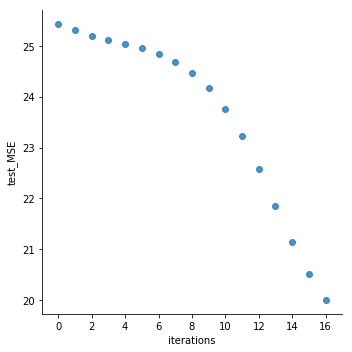

In [20]:


plotdata1 = DataFrame(np.vstack((np.arange(np.array(test_mse_loglist).shape[0]), test_mse_loglist)).T, columns=['iterations', 'test_MSE'])
sns_plot = sns.lmplot(plotdata1.columns[0], plotdata1.columns[1], data=plotdata1, fit_reg=False)
sns_plot.savefig("Fulltext_predictions_testMSE_%df_%d.png"%(n_features, best_loc), bbox_inches='tight')
sns_plot



In [22]:
min(test_mse_loglist), test_mse_loglist.index(min(test_mse_loglist)), 
train_mse_loglist[test_mse_loglist.index(min(test_mse_loglist))+1]

IndexError: list index out of range

In [23]:
min(train_mse_loglist), train_mse_loglist.index(min(train_mse_loglist)),

(19.49283027446057, 15)

In [24]:
latent_user_preferences

array([[ 0.337,  0.736,  0.436, ...,  0.664,  0.225,  0.646],
       [-0.072,  0.399,  0.062, ...,  0.166, -0.015,  0.097],
       [ 0.477,  0.805,  0.349, ...,  0.369,  0.592,  0.855],
       ...,
       [ 0.549,  0.728,  0.548, ...,  0.642,  0.743,  0.601],
       [ 0.636,  0.082,  0.499, ...,  0.019,  0.311,  0.408],
       [ 0.447,  0.782,  0.833, ...,  0.487,  0.911,  0.601]])

In [25]:
predictions = best_latent_user_preferences.dot(best_latent_item_features.T)
predictions

array([[-0.91 , -1.395, -2.574, ...,  0.445, -0.908,  0.331],
       [ 1.385,  1.4  ,  0.412, ...,  4.092,  0.717,  2.541],
       [ 2.813,  2.626,  3.122, ...,  3.603,  2.017,  3.115],
       ...,
       [-0.486, -1.374, -2.754, ..., -1.037, -2.498, -0.947],
       [-0.864, -1.139, -1.538, ..., -0.458, -2.343, -1.063],
       [ 1.265,  0.637,  0.621, ...,  1.594, -0.379,  1.608]])

In [26]:
err = []
for t in range(0, len(loc_log)):
    #print(predictions[loc_log[t][0],loc_log[t][1]], best_latent_user_preferences[loc_log[t][0]].dot(best_latent_item_features[loc_log[t][1]]), user_ratings_vali[loc_log[t][0]][loc_log[t][1]])
    err.append(best_latent_user_preferences[loc_log[t][0]].dot(best_latent_item_features[loc_log[t][1]])-user_ratings_vali[loc_log[t][0]][loc_log[t][1]])
mse2 = (np.array(err) ** 2).mean()
print(mse2)

20.00244839653315


In [27]:
vali_err = []
for loc in loc_log:
    vali_err.append(user_ratings_vali[loc[0]][loc[1]]-best_latent_user_preferences[loc[0]].dot(best_latent_item_features[loc[1]]))
test_mse = (np.array(vali_err) ** 2).mean()
print (test_mse)

20.00244839653315


In [28]:
best_test_mse

20.00244839653315

In [ ]:


values = [zip(user_ratings_copy[i], predictions[i]) for i in range(0,predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns
comparison_data.applymap(lambda x: "(%2.3f|%2.3f)"%(x[0],x[1]))
#comparison_data.head()



In [1]:
values = [zip(user_ratings_vali[i], predictions[i]) for i in range(0,predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns
comparison_data.applymap(lambda x: ["(%2.3f|%2.3f)"%(x[0],x[1])])

NameError: name 'predictions' is not defined

In [ ]:
print(mse)

In [ ]:
predictions

In [ ]:


latent_item_features



In [ ]:


np.savetxt("Fulltext_predictions_%df_%d.csv"%(n_features, best_loc), predictions, delimiter=",")
np.savetxt("Fulltext_latent_user_preferences_%df_%d.csv"%(n_features, best_loc), best_latent_user_preferences, delimiter=",")
np.savetxt("Fulltextlatent_item_features_%df_%d.csv"%(n_features, best_loc), best_latent_item_features, delimiter=",")

